# Synthetic Setting I

In [1]:
from utils.setting import config
import numpy as np
from model.sampler import GaussianMixtureSampler
import numpy as np
import matplotlib.pyplot as plt
from model.conformal_dra import ConformalizedDecisionRiskAssessment
from model.naive_dra import NaiveDecisionRiskAssessment 

config()

In [2]:
sampler_kwds = {
    'mu':       np.array([[-1e-1, -1e-1]]),     # [ ncomp, data_dim ] np, the mean of GMs
    'scale':    np.array([1]),                  # [ ncomp ] np, the variance of GMs 
}

sampler     = GaussianMixtureSampler(**sampler_kwds)

In [8]:
# Model setup
A = np.array([
    [1,    1],
    [-1,   0],
    [0,   -1]
])
b = np.array([1, 0, 0])

init_true_kwds = {
    'A':    A,
    'b':    b,
    'kwds': sampler_kwds,
    'boundary_scale':   10
}

true_dra    = ConformalizedDecisionRiskAssessment(**init_true_kwds)

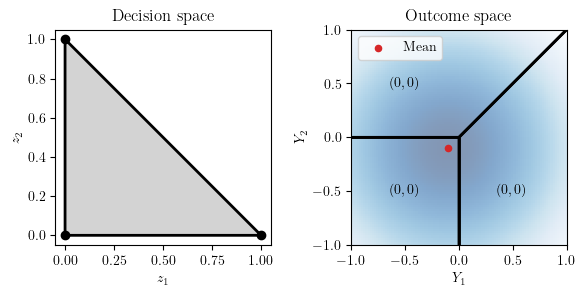

In [11]:
# get probability visualizations
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
xx_, yy_ = xx.flatten(), yy.flatten()
xy = np.stack([xx_, yy_], 1)          # [ ngrids, 2 ]
zz_sampler  = sampler.pdf(xy).reshape(xx.shape)
zz_model    = sampler.pdf(xy).reshape(xx.shape) 

plt_scale = 0.7
fig, axes = plt.subplots(1, 2, figsize = [10 * plt_scale, 4 * plt_scale])

kwds = {
    'label':        'Feasible region',
    'facecolor':   'lightgray',
    'edgecolor':   'black',
    'lw':           2,
}

ax = axes[0]
ax.set_title(r'Decision space')
ax = true_dra.plot_feasible_region(ax, kwds)
ax.set_ylabel(r'$z_2$')
ax.set_xlabel(r'$z_1$')
ax.set_aspect('equal', adjustable='box')
ax.scatter(0, 1, color = 'black')
ax.scatter(0, 0, color = 'black')
ax.scatter(1, 0, color = 'black')

kwds = {
    'facecolor': 'none',
    'lw':   2,
    'ls':   '-',
    'edgecolor':    'black',
    'zorder':  99
}

ax = axes[1]
ax = true_dra.plot_inverse_feasible_region(ax, kwds)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_ylabel(r'$Y_2$')
ax.set_xlabel(r'$Y_1$')
ax.set_title('Outcome space')

from matplotlib.colors import Normalize
norm = Normalize(vmin=0, vmax=1.0)  # or your desired limits
contours = ax.pcolormesh(xx, yy, zz_model, cmap = 'Blues', zorder = -1, alpha = 0.5, edgecolor = 'none')
ax.scatter(-0.1, -0.1, s = 20, color = 'tab:red', label = 'Mean', marker = 'o')
ax.set_aspect('equal', adjustable='box')
ax.legend()

ax.text(-0.5, -0.5, r'$(0, 0)$', va = 'center', ha = 'center')
ax.text(-0.5, 0.5, r'$(0, 0)$', va = 'center', ha = 'center')
ax.text(0.5, -0.5, r'$(0, 0)$', va = 'center', ha = 'center')

plt.show()

# Synthetic Setting II

In [12]:
sampler_kwds = {
    'mu':       np.array([[0.0, -0.8],
                          [-0.5, 0.25],
                          [0.8, -0.1]]),  # [ ncomp, data_dim ] np, the mean of GMs
    'scale':    np.array([1e-2, 3e-2, 2e-2]),                                # [ ncomp ] np, the variance of GMs 
    'weights':  np.array([0.3, 0.4, 0.3]),                                # [ ncomp ] np, the variance of GMs 
}

sampler     = GaussianMixtureSampler(**sampler_kwds)

mean    = sampler_kwds['weights'][:, None] * sampler_kwds['mu']
mean    = mean.mean(0) 

In [13]:
A = np.array([
    [-1/2, -1],
    [0,   -1],
    [-1/2, 1],
    [1/2,  1],
    [2,   -1],
    [1, 0],
    [0, 1],
    [-1, 0]
])
b = np.array([-1, 0, 1, 5, 10, 5.5, 2.5, -1])

init_true_kwds = {
    'A':    A,
    'b':    b,
    'kwds': sampler_kwds,
    'boundary_scale':   10
}

true_dra         = ConformalizedDecisionRiskAssessment(**init_true_kwds)

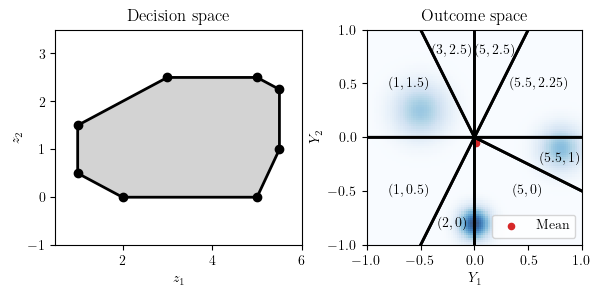

In [ ]:
# get probability visualizations
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
xx_, yy_ = xx.flatten(), yy.flatten()
xy = np.stack([xx_, yy_], 1)          # [ ngrids, 2 ]
zz_sampler  = sampler.pdf(xy).reshape(xx.shape)
zz_model    = sampler.pdf(xy).reshape(xx.shape)

plt_scale = 0.7
fig, axes = plt.subplots(1, 2, figsize = [10 * plt_scale, 4 * plt_scale])

kwds = {
    'label':        'Feasible region',
    'facecolor':   'lightgray',
    'edgecolor':   'black',
    'lw':           2,
}

ax = axes[0]
ax.set_title(r'Decision space')
ax = true_dra.plot_feasible_region(ax, kwds)
ax.set_ylabel(r'$z_2$')
ax.set_xlabel(r'$z_1$')
for v in true_dra.vertices:
    ax.scatter(*v, color = 'black')
ax.set_ylim(-1, 3.5)
ax.set_xlim(.5, 6)

kwds = {
    'facecolor': 'none',
    'lw':   2,
    'ls':   '-',
    'edgecolor':    'black',
    'zorder':  99
}

ax = axes[1]
ax = true_dra.plot_inverse_feasible_region(ax, kwds)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_ylabel(r'$Y_2$')
ax.set_xlabel(r'$Y_1$')
ax.set_title('Outcome space')

from matplotlib.colors import Normalize
norm = Normalize(vmin=0, vmax=1.0)  # or your desired limits

contours = ax.pcolormesh(xx, yy, zz_model, cmap = 'Blues', zorder = -1, alpha = 0.8, edgecolor = 'none')
ax.set_aspect('equal', adjustable='box')

ax.scatter(*mean, s = 20, color = 'tab:red', label = 'Mean', marker = 'o')
ax.legend()

ax.text(-0.6, 0.5, r'$(1, 1.5)$', ha = 'center', va = 'center')
ax.text(-0.2, 0.8, r'$(3, 2.5)$', ha = 'center', va = 'center')
ax.text(0.2, 0.8, r'$(5, 2.5)$', ha = 'center', va = 'center')
ax.text(0.6, 0.5, r'$(5.5, 2.25)$', ha = 'center', va = 'center')
ax.text(0.8, -0.2, r'$(5.5, 1)$', ha = 'center', va = 'center')
ax.text(0.5, -0.5, r'$(5, 0)$', ha = 'center', va = 'center')
ax.text(-0.2, -0.8, r'$(2, 0)$', ha = 'center', va = 'center')
ax.text(-0.6, -0.5, r'$(1, 0.5)$', ha = 'center', va = 'center')

plt.show()